✅ 讀取成功！欄位： ['Label', 'Model', 'Train_AUC', 'Train_ACC', 'Test_AUC', 'Test_ACC']


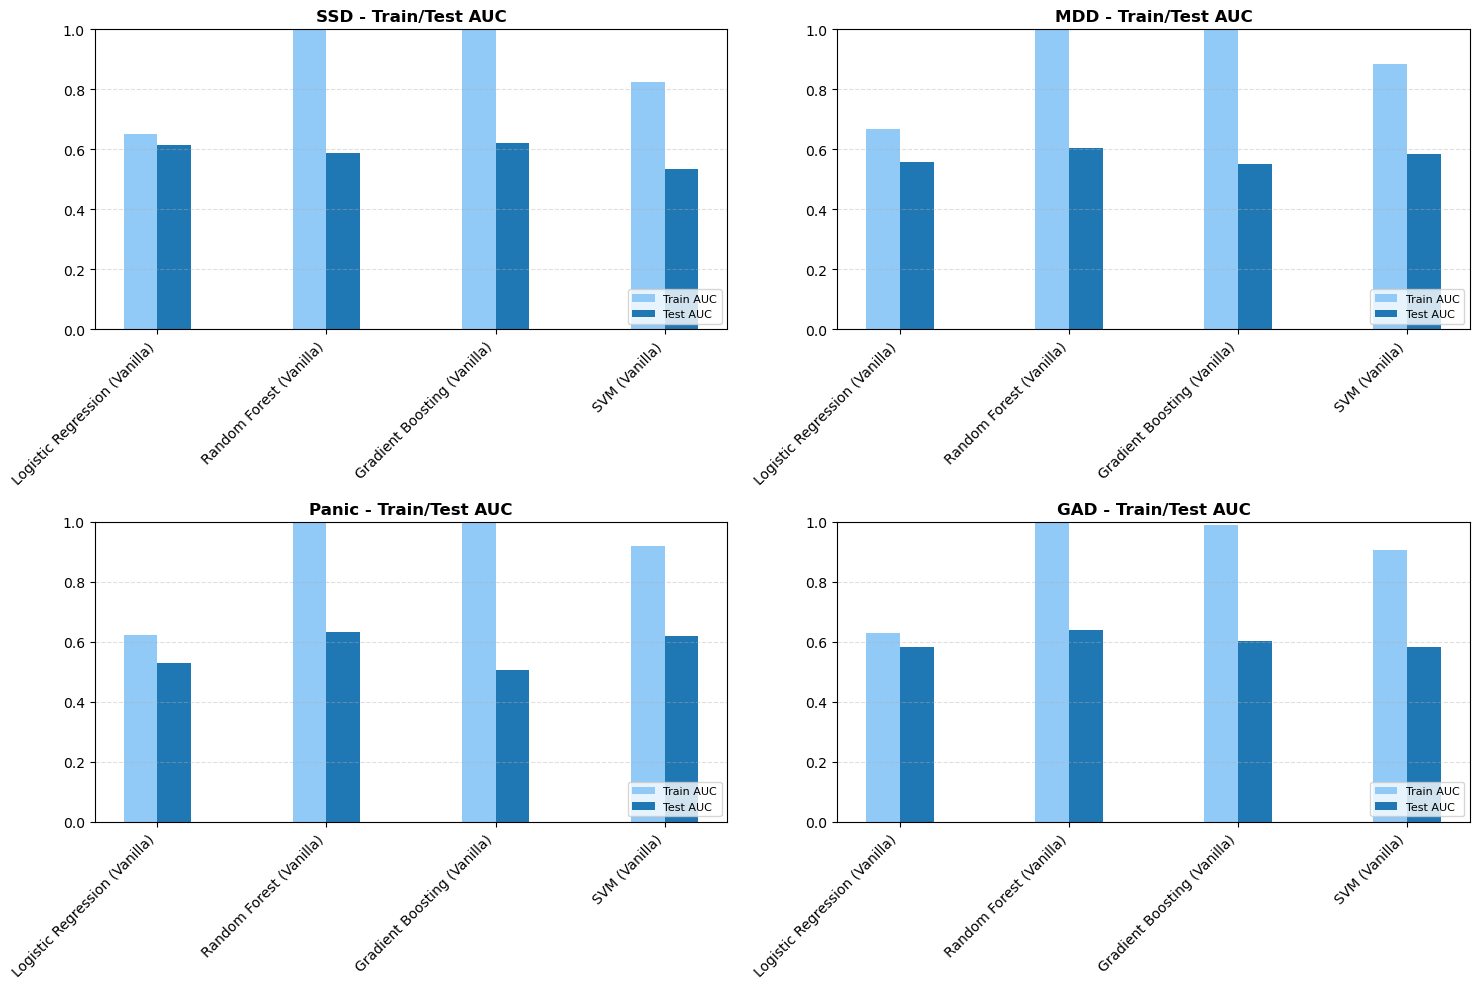

✅ AUC 圖片已輸出至：D:\FLY114\Run_20251009_115734\plots\model_train_test_auc_only.png


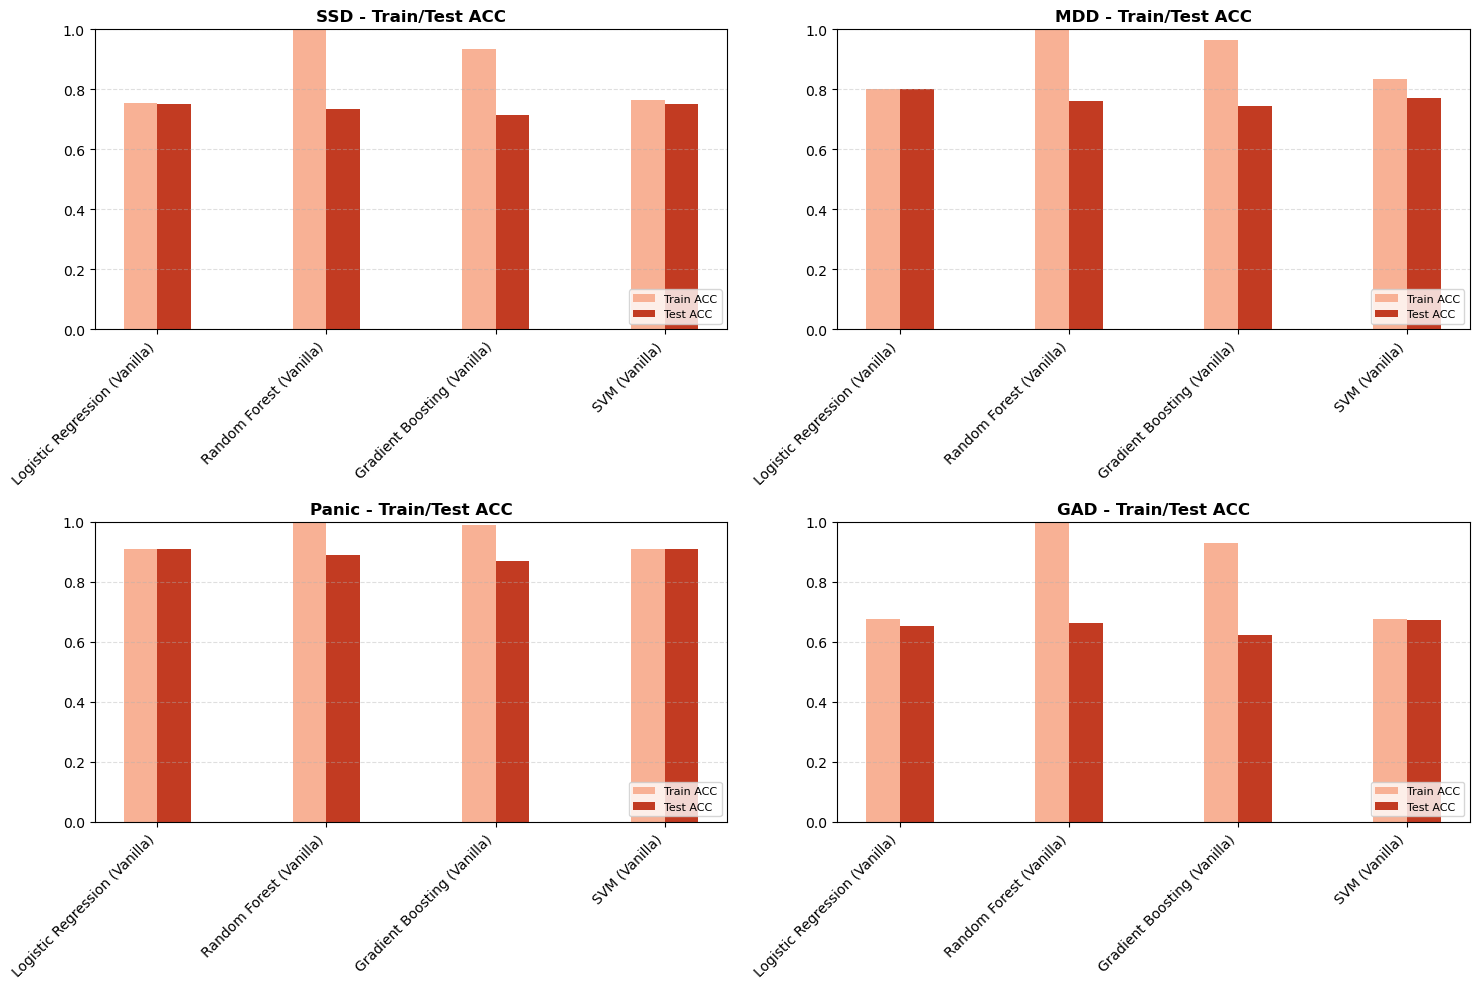

✅ ACC 圖片已輸出至：D:\FLY114\Run_20251009_115734\plots\model_train_test_acc_only.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# === 1️⃣ 讀取 Excel ===
excel_path = r"D:\FLY114\Run_20251009_115734\enhanced_analysis_summary_20251009_115734.xlsx"
sheet_name = "test"

df = pd.read_excel(excel_path, sheet_name=sheet_name)
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

print("✅ 讀取成功！欄位：", df.columns.tolist())

# === 2️⃣ 基本設定 ===
labels = df["Label"].unique()
models = df["Model"].unique()
x = np.arange(len(models))
width = 0.2

plot_dir = r"D:\FLY114\Run_20251009_115734\plots"
os.makedirs(plot_dir, exist_ok=True)

# === 顏色設定 ===
colors = {
    "Train AUC": "#91c9f7",
    "Test AUC": "#1f77b4",
    "Train ACC": "#f8b195",
    "Test ACC": "#c23b22"
}

# =====================================================
# 🎯 第一張圖：AUC（Train + Test）
# =====================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, label in enumerate(labels):
    subset = df[df["Label"] == label]
    train_aucs = subset["Train_AUC"]
    test_aucs = subset["Test_AUC"]

    axes[idx].bar(x - 0.5*width, train_aucs, width, label='Train AUC', color=colors["Train AUC"])
    axes[idx].bar(x + 0.5*width, test_aucs,  width, label='Test AUC',  color=colors["Test AUC"])

    axes[idx].set_title(f"{label} - Train/Test AUC", fontsize=12, fontweight="bold")
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(models, rotation=45, ha='right')
    axes[idx].set_ylim(0, 1)
    axes[idx].grid(axis="y", linestyle="--", alpha=0.4)
    axes[idx].legend(loc='lower right', fontsize=8)

plt.tight_layout()
output_auc = os.path.join(plot_dir, "model_train_test_auc_only.png")
plt.savefig(output_auc, dpi=300, bbox_inches="tight")
plt.show()
print(f"✅ AUC 圖片已輸出至：{output_auc}")

# =====================================================
# 🎯 第二張圖：ACC（Train + Test）
# =====================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, label in enumerate(labels):
    subset = df[df["Label"] == label]
    train_accs = subset["Train_ACC"]
    test_accs = subset["Test_ACC"]

    axes[idx].bar(x - 0.5*width, train_accs, width, label='Train ACC', color=colors["Train ACC"])
    axes[idx].bar(x + 0.5*width, test_accs,  width, label='Test ACC',  color=colors["Test ACC"])

    axes[idx].set_title(f"{label} - Train/Test ACC", fontsize=12, fontweight="bold")
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(models, rotation=45, ha='right')
    axes[idx].set_ylim(0, 1)
    axes[idx].grid(axis="y", linestyle="--", alpha=0.4)
    axes[idx].legend(loc='lower right', fontsize=8)

plt.tight_layout()
output_acc = os.path.join(plot_dir, "model_train_test_acc_only.png")
plt.savefig(output_acc, dpi=300, bbox_inches="tight")
plt.show()
print(f"✅ ACC 圖片已輸出至：{output_acc}")
